In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls "/content/drive/My Drive/Minor Project"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random 
import os
from matplotlib.image import imread
from os import listdir
from PIL import Image

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical

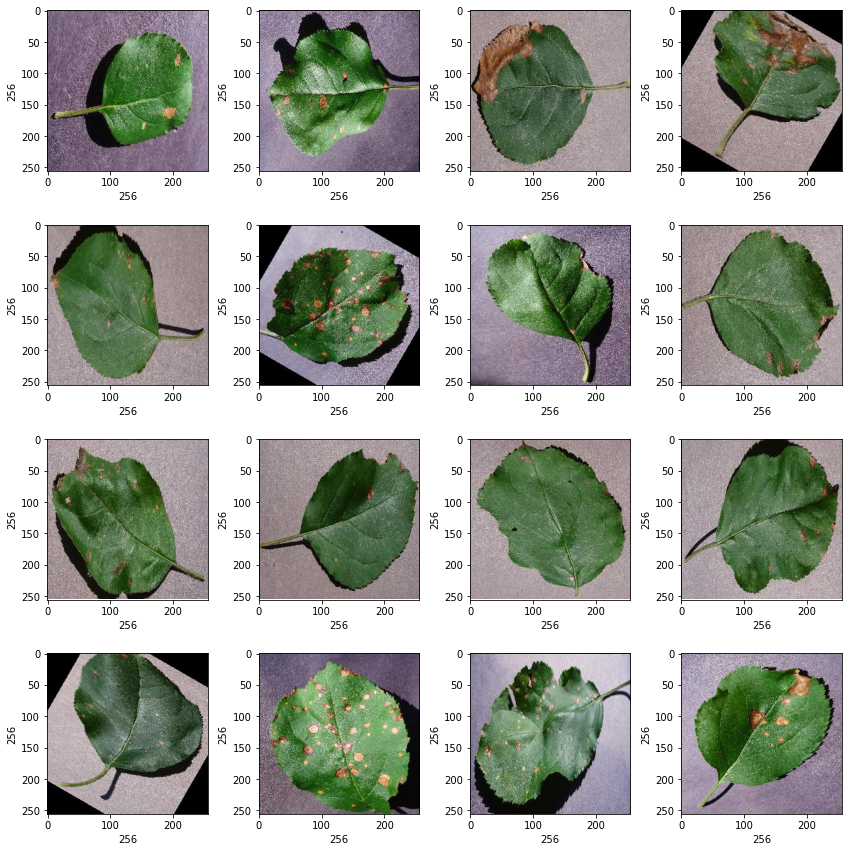

In [ ]:
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Minor Project/New Dataset/Black_Rot"
for i in range (1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/' +random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)

In [ ]:
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None :
      image = cv2.resize(image, (256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
     print(f"Error : {e}")
     return None   

In [ ]:
dir = "/content/drive/My Drive/Minor Project/New Dataset"
root_dir = listdir(dir)
image_list , label_list = [] , []
all_labels = ['Alternaria leaf spot' , 'Apple_scab','Black_Rot','Brown spot' ,'Cedar_Apple_Rust','Gray Spot' , 'healthy']
binary_labels = [0,1,2,3,4,5,6]
temp = -1

#Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [ ]:
#Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head(7)

4    502
3    395
0    323
2    306
5    306
6    278
1    215
dtype: int64

In [ ]:
#Observing the shape of image
for i in range(0,7):
    print(image_list[i].shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [ ]:
#Shape of Image
label_list = np.array(label_list)
label_list.shape

(2325,)

In [ ]:
#Test Train split using sklearn.train_test_split
#Train size = 80% and test size = 20% 

x_train,x_test,y_train,y_test = train_test_split(image_list,label_list,train_size=0.8,random_state = 10)

In [ ]:
# Normalization of Images as pixel ranges from (0,255) so divided each image pixel with 255 to normalize the images
x_train = np.array(x_train, dtype=np.float16)/255.0
x_test = np.array(x_test, dtype=np.float16)/255.0
x_train = x_train.reshape(-1,256,256,3)
x_test = x_test.reshape(-1,256,256,3)

In [ ]:
# Converting data to Categorical Data 
#One Hot Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(128,(3,3),padding="same",input_shape=(256,256,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(7, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 42, 42, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 21, 21, 64)       0

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer = Adam(0.0001),metrics=['accuracy'])



In [ ]:
#splitting the data in training and validation dataset
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2)

In [ ]:
#Training the Model
epochs = 40
batch_size = 128
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val,y_val))

Epoch 1/40
12/12 [==============================] - 21s 924ms/step - loss: 1.8668 - accuracy: 0.2339 - val_loss: 1.7732 - val_accuracy: 0.2903
Epoch 2/40
12/12 [==============================] - 7s 549ms/step - loss: 1.6631 - accuracy: 0.3656 - val_loss: 1.5034 - val_accuracy: 0.4543
Epoch 3/40
12/12 [==============================] - 7s 551ms/step - loss: 1.3492 - accuracy: 0.5605 - val_loss: 1.2416 - val_accuracy: 0.5565
Epoch 4/40
12/12 [==============================] - 7s 555ms/step - loss: 1.0537 - accuracy: 0.6290 - val_loss: 0.9830 - val_accuracy: 0.6774
Epoch 5/40
12/12 [==============================] - 7s 555ms/step - loss: 0.8434 - accuracy: 0.7386 - val_loss: 0.8101 - val_accuracy: 0.7070
Epoch 6/40
12/12 [==============================] - 7s 557ms/step - loss: 0.6870 - accuracy: 0.7796 - val_loss: 0.7908 - val_accuracy: 0.6935
Epoch 7/40
12/12 [==============================] - 7s 556ms/step - loss: 0.5894 - accuracy: 0.8219 - val_loss: 0.6481 - val_accuracy: 0.7796
Epoch

In [ ]:
model.save("/content/drive/My Drive/Minor Project/New Dataset/apple_disease.h5")
#model to json
json_model = model.to_json()
with open("/content/drive/My Drive/Minor Project/New Dataset/apple_model.json","w") as json_file:
  json_file.write(json_model)
#saving the model
model.save_weights("/content/drive/My Drive/Minor Project/New Dataset/apple_disease_weights.h5")  

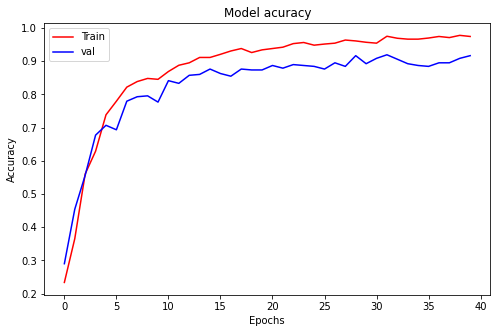

In [ ]:
#Plot the training history
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title('Model acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','val'])
plt.show()

In [ ]:
#Accuracy of Model
print("Model Accuracy: ")
scores = model.evaluate(x_test,y_test)
print(f"Accuracy: {scores[1]*100}")

Model Accuracy: 
15/15 [==============================] - 2s 85ms/step - loss: 0.2284 - accuracy: 0.9312
Accuracy: 93.11828017234802


In [ ]:
#prediction
y_pred = model.predict(x_test)

15/15 [==============================] - 1s 56ms/step


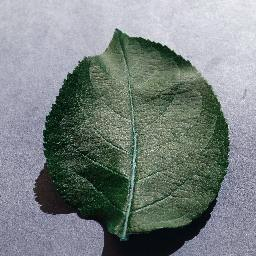

In [ ]:
#plotting the image to compae
img = array_to_img(x_test[1])
img

In [ ]:

print("Originally: ",all_labels[np.argmax(y_test[1])])
print("Predicted: ",all_labels[np.argmax(y_pred[1])])

Originally:  Cedar_Apple_Rust
Predicted:  Cedar_Apple_Rust


In [ ]:
for i in range(10):
  print("Originally: " + all_labels[np.argmax(y_test[i])] + "\t\tPredicted:" + all_labels[np.argmax(y_pred[i])])

 

Originally: Gray Spot		Predicted:Gray Spot
Originally: Cedar_Apple_Rust		Predicted:Cedar_Apple_Rust
Originally: Cedar_Apple_Rust		Predicted:Cedar_Apple_Rust
Originally: Brown spot		Predicted:Brown spot
Originally: Alternaria leaf spot		Predicted:Alternaria leaf spot
Originally: Brown spot		Predicted:Brown spot
Originally: Alternaria leaf spot		Predicted:Alternaria leaf spot
Originally: Gray Spot		Predicted:Gray Spot
Originally: Gray Spot		Predicted:Gray Spot
Originally: Brown spot		Predicted:Brown spot
